In [322]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from jupyterthemes import jtplot
from sklearn.metrics import auc, roc_curve, roc_auc_score
%matplotlib inline
jtplot.style()

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

In [323]:
data = pd.read_csv('Kobe.csv')

In [324]:
target = 'shot_made_flag'

In [325]:
data[target].value_counts()

0.0    14232
1.0    11465
Name: shot_made_flag, dtype: int64

In [326]:
columns = data.columns
columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

In [327]:
data.head(5)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


Из результатов info() видно, что нулевые значения есть тольо в целевом столбце shot_made_flag и их там 5000. по заданию кагл неам необходимо для этих значений предсказать, что Коби забросил мяч. поэтому запишем в переменную data_train данные для тренировки и валидации модели, data_eval - данные, для которых необходимо предсказать результат

In [328]:
data['shot_made_flag'].head(10)

0    NaN
1    0.0
2    1.0
3    0.0
4    1.0
5    0.0
6    1.0
7    NaN
8    1.0
9    0.0
Name: shot_made_flag, dtype: float64

In [329]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

In [330]:
#данные с ненулевыми занчениями в строках.
data_train = data[data.isnull()['shot_made_flag'] == False]
data_train.head(5)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6


In [331]:
#количество нулевых значений в датасете
data.isnull().values.sum()

5000

In [332]:
#данные с отсутствующими целевыми значениями
data_eval = data[data.isnull()['shot_made_flag'] == True]

Выделим категориальные и числовые признаки (предваринтельные):

In [333]:
#признаки числовым типом
feat_num = [col for col in list(data_train.columns) if data[col].dtype != 'O']
#признаки не числовым типом (категориальные)
feat_cat = [col for col in list(data_train.columns) if data[col].dtype == 'O']

In [334]:
feat_cat

['action_type',
 'combined_shot_type',
 'season',
 'shot_type',
 'shot_zone_area',
 'shot_zone_basic',
 'shot_zone_range',
 'team_name',
 'game_date',
 'matchup',
 'opponent']

Проверим количество уникальных значений для признаков:

In [335]:
data_train[feat_cat].head(5)

,action_type,combined_shot_type,season,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_name,game_date,matchup,opponent
1,Jump Shot,Jump Shot,2000-01,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
2,Jump Shot,Jump Shot,2000-01,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
3,Jump Shot,Jump Shot,2000-01,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
4,Driving Dunk Shot,Dunk,2000-01,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
5,Jump Shot,Jump Shot,2000-01,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,Los Angeles Lakers,2000-10-31,LAL @ POR,POR


In [336]:
print('Категориальне признаки на основе типа O:')
for cat in feat_cat:
    cat_uniq_qty = len(list(data_train[cat].unique()))
    print(cat, cat_uniq_qty)

Категориальне признаки на основе типа O:
action_type 55
combined_shot_type 6
season 20
shot_type 2
shot_zone_area 6
shot_zone_basic 7
shot_zone_range 5
team_name 1
game_date 1558
matchup 74
opponent 33


In [337]:
print('Непрерывные числовые признаки:')
for feature in feat_num:
    cat_uniq_qty = len(list(data_train[feature].unique()))
    print(feature, cat_uniq_qty)

Непрерывные числовые признаки:
game_event_id 618
game_id 1558
lat 446
loc_x 486
loc_y 446
lon 486
minutes_remaining 12
period 7
playoffs 2
seconds_remaining 60
shot_distance 74
shot_made_flag 2
team_id 1
shot_id 25697


Необходимо удалить из датасета столбец:
 - team_name, так как он имеет одно уникальное значение и не несет какой-либо значимости для модели.
 - team_id, так как он имеет одно уникальное значение и не несет какой-либо значимости для модели.
 - shot_id - так как это просто полрядковый номер гола в датасете. Этот признак точно н сделает лучше нашу модель, а может и сделать хуже, так как величина данных ничего не значит.
 - matchup, так как он является сочетанием данных из team_name (имя комнады игрока всегда одно) и opponnt (имя команды противника). в таком случае можно сотавить только opponent.
 - lat, lon - долгота, широта. судя по тому, что они отличаются в рамках одной игры, то это координаты игрока во время броска. у нас эти данные сгрппированы категориальными признаками shot_zone
 - shot_made_flag - это целевая переменная, которую надо удалить из датасета с признаками.

Оставить или модфицировать:
 - shot_zone_area, shot_zone_basic, shot_zone_range (cat) - оставим, так как они являются координатами броска. Возможно из каких-то мест игро лучше делает броски, а из каких-то хуже, что повлиет на успешность броска.
 - shot_type (cat) - тип гола по количеству очков (2, 3х очковые). оставляем.
 - game_date - необходимо выделить выделить года и месяцы, так как возможны какие-то закономерности. 
 - season еще есть смысл выделить отдельно год и месяц.  разные сезоны результативность игрока может отличаться
 - action_type - тип броска: 55 уникальных значений. Пока оставляет, так как это вид броска, а он может влиять на результат: какие-то забиваются чаще, а какие-то реже. Частично укрупнен в combined_shot_type. возможно позже удалим тот или другой и посмотрим на результат.
 - minutes_remaining в диапозоне от 0-11. оставшееся время до конца периода (минуты).Чем меньше время, тем больше забивается мячей.
 - seconds remaining в диапозоне 0-59 (секунды). Возможно удалить, так как есть минуты (своего рода укрупненные группы времени). но можно и перевести минуты-секунды в просто секунды.
 - period - похоже на серии, так как связаны с id матчей
 - playoffs (cat) - тип игры: турнира (1) или нет (0). Катеориальная переменная
 - shot_distance - дистанция броска 
 
Под вопорсом (удалить):
 - game_event_id - неведомая штука. похожа на хронологию в единицах времени. на всякий случай оставим пока
 - loc_x, loc_y - тоже какие-то координаты неведомые. на всякий случай оставим пока


In [338]:
feat_cat.remove('team_name')
feat_cat.remove('matchup')
feat_num.remove('shot_id')
feat_num.remove('lat')
feat_num.remove('lon')
feat_num.remove('shot_made_flag')
feat_num.remove('team_id')

In [339]:
data_train[feat_cat].head(5)

,action_type,combined_shot_type,season,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,opponent
1,Jump Shot,Jump Shot,2000-01,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,POR
2,Jump Shot,Jump Shot,2000-01,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2000-10-31,POR
3,Jump Shot,Jump Shot,2000-01,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,2000-10-31,POR
4,Driving Dunk Shot,Dunk,2000-01,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,2000-10-31,POR
5,Jump Shot,Jump Shot,2000-01,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,POR


In [340]:
data_train[feat_num].head(5)

,game_event_id,game_id,loc_x,loc_y,minutes_remaining,period,playoffs,seconds_remaining,shot_distance
1,12,20000012,-157,0,10,1,0,22,15
2,35,20000012,-101,135,7,1,0,45,16
3,43,20000012,138,175,6,1,0,52,22
4,155,20000012,0,0,6,2,0,19,0
5,244,20000012,-145,-11,9,3,0,32,14


Посмотрим на корелляцию непрерывных признаков на предмет выявления закономерносетей или удаления кореллированных признаков. Целевая переменная не кореллирует ни с одной из пеерменных, что и очевидно, так как это класс из двух значений (больше категория). Есть высокая корелляция между period-game_event_id (серии связаны с идентификаторами матчкй), game_id-playoffs (идентификаторы для плэйофф начинаются с 4, остальные с 2). Shot_distance также связана с Loc_y (похоже координата на поле). посзже для упрощения можно удалить один из каждой пары признаков.
Что кастается распределний, то нормальных (гауссовских) здесь нет

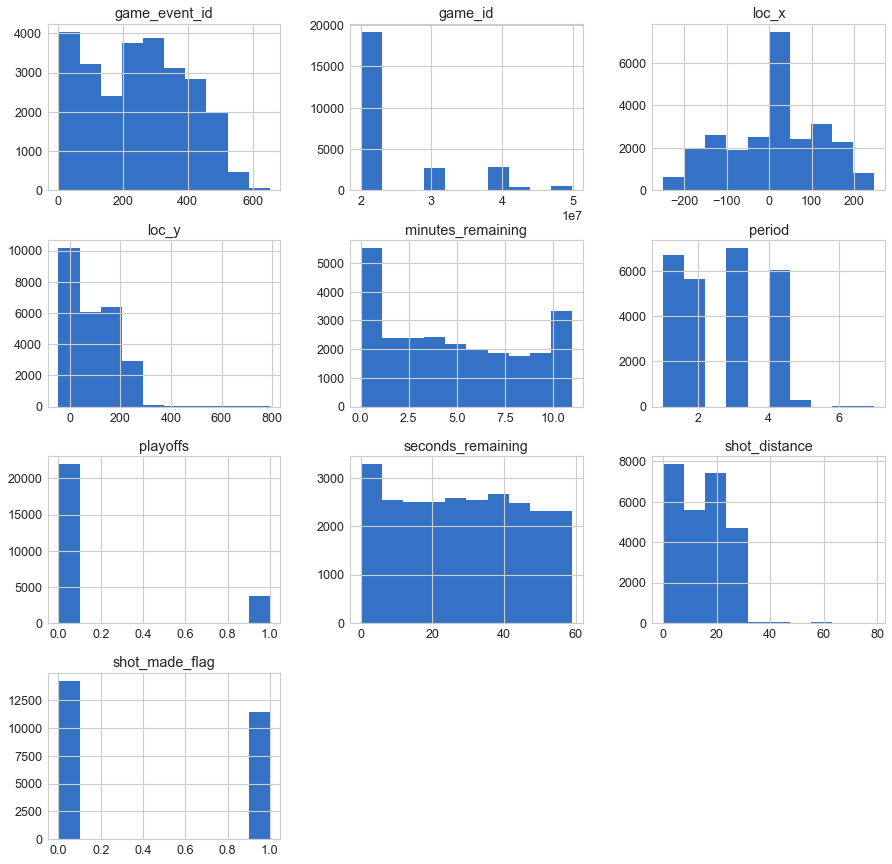

In [341]:
data_train[feat_num+[target]].hist(figsize = (15,15))
plt.show()

(10.0, 0.0)

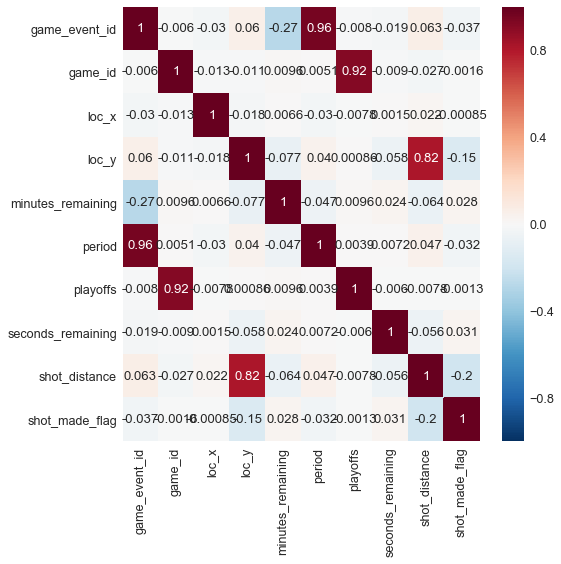

In [342]:
plt.figure(figsize=(8, 8))
ax = sns.heatmap(data_train[feat_num+[target]].corr(), cmap=sns.color_palette("RdBu_r", 1000), vmin=-1, center=0, annot=True)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

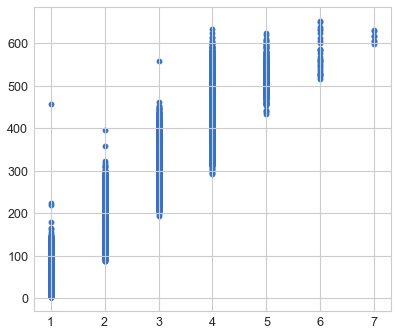

In [343]:
plt.scatter(data_train['period'], data_train['game_event_id'])

Проверим визуально числовые признаки на выбросы
Видимо незначительные выбросы на game_id, period. Если смотреть на смысл значений, то нельзя сказать, что их много. loc_y и shot_distance по сути одно и тоже, что и подтверждается на графике в виде корелляции 0,82. Удалять особо нечего

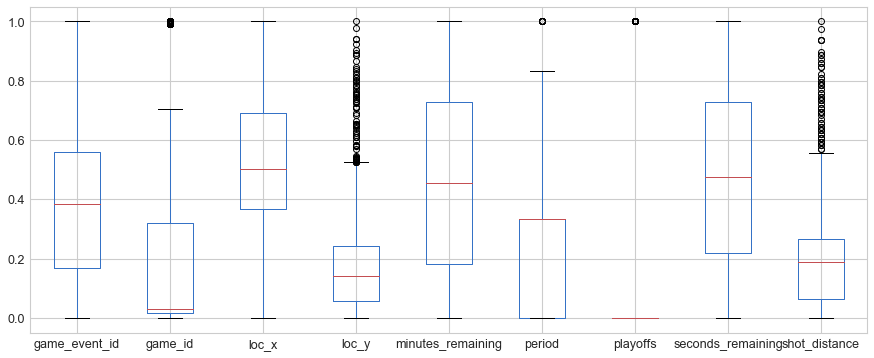

In [344]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
mm_X = mm_scaler.fit_transform(data_train[feat_num])
bp = pd.DataFrame(mm_X, columns = feat_num)
bp.boxplot(figsize = (15,6))

(array([5.130e+03, 8.020e+02, 3.170e+02, 1.001e+03, 6.030e+02, 1.096e+03,
        1.190e+03, 6.440e+02, 1.680e+03, 9.720e+02, 2.390e+03, 1.195e+03,
        2.124e+03, 1.242e+03, 4.930e+02, 2.894e+03, 1.060e+03, 6.160e+02,
        8.300e+01, 2.400e+01, 1.200e+01, 7.000e+00, 1.000e+01, 1.000e+01,
        1.400e+01, 1.400e+01, 6.000e+00, 9.000e+00, 2.000e+00, 5.000e+00,
        3.000e+00, 5.000e+00, 4.000e+00, 1.000e+00, 4.000e+00, 3.000e+00,
        5.000e+00, 4.000e+00, 1.000e+00, 6.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 3.000e+00, 3.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([ 0.  ,  1.58,  3.16,  4.74,  6.32,  7.9 ,  9.48, 11.06, 12.64,
        14.22, 15.8 , 17.38, 18.96, 20.54, 22.12, 23.7 , 25.28, 26.86,
        28.44, 30.02, 31.6 , 33.18, 34.76, 36.34, 37.92, 39.5 , 41.08,
        42.66, 44.24, 45.82, 47.4 , 48.98, 50.56, 52.14, 53.72, 55.3 ,
        56.88, 58.46, 60.04, 61.62, 63.2 , 64.78, 66.36, 67.94, 69.52,
        71.1 , 72.68,

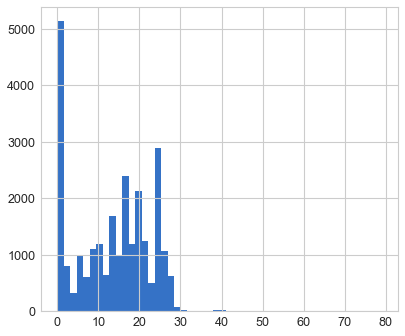

In [345]:
plt.hist(data_train['shot_distance'], bins = 50)

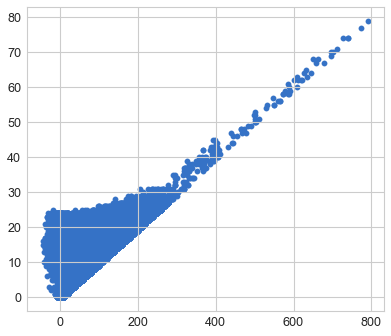

In [346]:
plt.scatter(data_train['loc_y'], data_train['shot_distance'])

In [347]:
y = data_train['shot_made_flag']

In [348]:
X =data_train[feat_num + feat_cat].copy()

Разложим категориальный признак даты на год и месяц, чтобы учесть сезонные колебания. Также оставим как есть поле season, чтобы показать группу матчей сезона (содержит два года)

In [349]:
def Month(x):
    return int(x[5:7])
def Year(x):
    return int(x[0:4])

X['month'] = X.apply(lambda x: Month(x['game_date']), axis = 1)
X['year'] = X.apply(lambda x: Year(x['game_date']), axis = 1)
X.drop(['game_date'], axis = 1, inplace = True)
feat_num += ['month', 'year']
feat_cat.remove('game_date')

In [350]:
X.head(3)

,game_event_id,game_id,loc_x,loc_y,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,action_type,combined_shot_type,season,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,opponent,month,year
1,12,20000012,-157,0,10,1,0,22,15,Jump Shot,Jump Shot,2000-01,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,POR,10,2000
2,35,20000012,-101,135,7,1,0,45,16,Jump Shot,Jump Shot,2000-01,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,POR,10,2000
3,43,20000012,138,175,6,1,0,52,22,Jump Shot,Jump Shot,2000-01,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,POR,10,2000


Выполним onehotencoding для категориальных признаков

In [351]:
X = pd.get_dummies(X, columns=feat_cat)

In [352]:
X.head(3)

,game_event_id,game_id,loc_x,loc_y,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,month,...,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_SEA,opponent_TOR,opponent_UTA,opponent_VAN,opponent_WAS
1,12,20000012,-157,0,10,1,0,22,15,10,...,0,0,1,0,0,0,0,0,0,0
2,35,20000012,-101,135,7,1,0,45,16,10,...,0,0,1,0,0,0,0,0,0,0
3,43,20000012,138,175,6,1,0,52,22,10,...,0,0,1,0,0,0,0,0,0,0


Нормализуем данные на случай, если придется использовать методы, классификации, чувствительные к диапозонам данных (e.g. svm)

In [353]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xm = scaler.fit_transform(X)

Разделим датасет на тренировочный и тестовый:

In [354]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xm, y, test_size=0.3, random_state=0)

Применим различные методы классификаторов и оценим их результаты:
для начала пристрелочный вариант с универсальным методом случаного леса

In [355]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from mlxtend.classifier import StackingCVClassifier

In [356]:
rfc = RandomForestClassifier(
    n_estimators=100,
    max_depth=20, 
    min_samples_leaf=20
)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=20)

Посмотрим на важность признаков. В TOP5 попадают: action_type (определнных типов), shot_distance, loc_y

([<matplotlib.axis.YTick at 0x26f168160c8>,
 <a list of 30 Text yticklabel objects>)

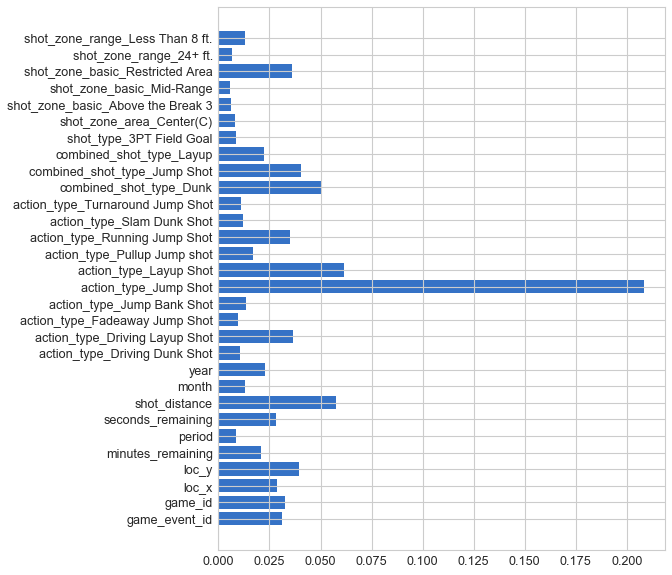

In [357]:
feat_imp = np.hstack((rfc.feature_importances_.reshape(-1, 1), X.columns.ravel().reshape(-1,1)))
FI = feat_imp[feat_imp[:,0]>0.005]
plt.figure(figsize=(8, 10))
plt.barh(np.arange(len(FI)), FI[:,0])
plt.yticks(np.arange(len(FI)),FI[:,1])

Оценим результаты работы модели:

In [358]:
rfc.score(X_test, y_test)

0.6809338521400778

In [359]:
rfc.score(X_train, y_train)

0.6911102462889865

Подберем оптимальне параметры для случайного леса:

In [360]:
scores = []
params = []
for depth in range(20,2,-2):
    for leaf in range(20,2,-2):
        rfc = RandomForestClassifier(
            n_estimators = 20,
            max_depth = depth, 
            min_samples_leaf = leaf
        )
        rfc.fit(X_train, y_train)
        scores.append(rfc.score(X_test, y_test))
        params.append([depth, leaf])

In [361]:
max_index = np.argmax(np.array(scores))
rfc = RandomForestClassifier(
            n_estimators = 100,
            max_depth = params[max_index][0], 
            min_samples_leaf= params[max_index][1]
            )
rfc.fit(X_train, y_train)
        
print('Максимальная точность на тестовом датасете равна: ', rfc.score(X_test, y_test))
print('Максимальная точность на тренировочномм датасете равна: ', rfc.score(X_train, y_train))
print('при параметрах: max_depth ', rfc.max_depth, ', min_samples_leaf ', rfc.min_samples_leaf)
print('')

Максимальная точность на тестовом датасете равна:  0.6813229571984436
Максимальная точность на тренировочномм датасете равна:  0.7018958136431868
при параметрах: max_depth  16 , min_samples_leaf  6



Так как стэкинг может включать в себя несколько методов, то попробуем включить в него все остальные методы и заодно проверить их отдельные значения

In [362]:
Stacking_Classifier = StackingClassifier(
    [
        ('log', LogisticRegression()),
        ('svm', SVC()),
        ('rf', RandomForestClassifier(max_depth=12, min_samples_leaf=16, random_state=42)),
        ('ri', RidgeClassifier())
    ],
RandomForestClassifier())

Stacking_Classifier.fit(X_train, y_train)

C:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

StackingClassifier(estimators=[('log', LogisticRegression()), ('svm', SVC()),
                               ('rf',
                                RandomForestClassifier(max_depth=12,
                                                       min_samples_leaf=16,
                                                       random_state=42)),
                               ('ri', RidgeClassifier())],
                   final_estimator=RandomForestClassifier())

In [363]:
print(
    ' r2 score for stacking classification model: ', Stacking_Classifier.score(X_test, y_test),
    '\n r2 score for linear classification model: ', Stacking_Classifier.named_estimators_['log'].score(X_test, y_test),
    '\n r2 score for Support Vector classification model: ', Stacking_Classifier.named_estimators_['svm'].score(X_test, y_test),
    '\n r2 score for Random Forest classification model: ', Stacking_Classifier.named_estimators_['rf'].score(X_test, y_test),
    '\n r2 score for Ridge classification model: ', Stacking_Classifier.named_estimators_['ri'].score(X_test, y_test)
)


 r2 score for stacking classification model:  0.6443579766536965 
 r2 score for linear classification model:  0.6802853437094682 
 r2 score for Support Vector classification model:  0.6779507133592737 
 r2 score for Random Forest classification model:  0.6800259403372244 
 r2 score for Ridge classification model:  0.6798962386511025


Отобразим график зависимости показателя точности от гиперпараметра альфа. Пик точности приходится на значение альфа = 10

In [364]:
alfa = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 5, 7, 10, 15, 18]
score_ridge = []
score_ridge_train = []
for para in alfa:
    rc = RidgeClassifier(alpha = para)
    rc.fit(X_train, y_train)
    #rc.score(X_test, y_test)
    score_ridge.append(rc.score(X_test, y_test))
    score_ridge_train.append(rc.score(X_train, y_train))
score_ridge

[0.6798962386511025,
 0.6798962386511025,
 0.6798962386511025,
 0.6798962386511025,
 0.6798962386511025,
 0.6798962386511025,
 0.6798962386511025,
 0.6798962386511025,
 0.6798962386511025,
 0.6798962386511025,
 0.6797665369649806,
 0.6797665369649806,
 0.6798962386511025,
 0.6798962386511025,
 0.6798962386511025]

Построим ROC и precision-recall графики. так как количество количество наблюдение в целевых классов условно одинаковое. поэтому можем использовать для оенки ROC кривую

In [365]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
lr = LogisticRegression()
lr.fit(X_train, y_train)
svc = SVC(probability = True)
svc.fit(X_train, y_train)

C:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


SVC(probability=True)

In [366]:
predictions_rfc = rfc.predict_proba(X_test)
predictions_lr = lr.predict_proba(X_test)
predictions_svc = svc.predict_proba(X_test)

Text(0, 0.5, 'True Positive Rate')

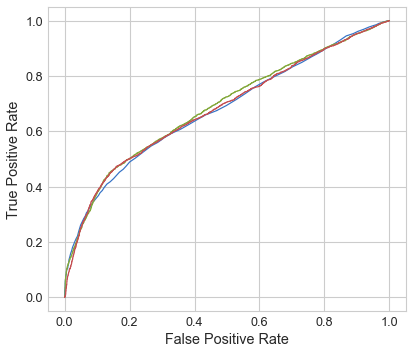

In [367]:
fpr_rfc, tpr_rfc, thres_rfc = roc_curve( y_test, predictions_rfc[:, 1] )
fpr_lr, tpr_lr, thres_lr = roc_curve( y_test, predictions_lr[:, 1] )
fpr_svc, tpr_svc, thres_svc = roc_curve( y_test, predictions_svc[:, 1] )
fig, ax = plt.subplots()
ax.plot( fpr_rfc, tpr_rfc)
ax.plot( fpr_lr, tpr_lr)
ax.plot( fpr_svc, tpr_svc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

Text(0, 0.5, 'precision')

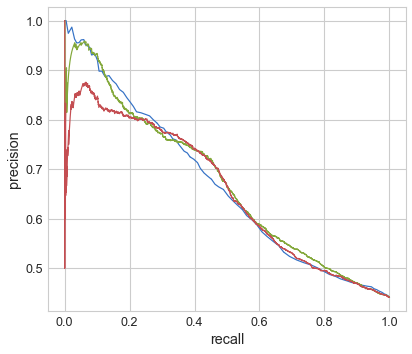

In [368]:
#precision и recall
precision_rfc, recall_rfc, thres_rfc = precision_recall_curve(y_test, predictions_rfc[:, 1] )
precision_lr, recall_lr, thres_lr = precision_recall_curve(y_test, predictions_lr[:, 1] )
precision_svc, recall_svc, thres_svc = precision_recall_curve(y_test, predictions_svc[:, 1] )
fig, ax = plt.subplots()
ax.plot(recall_rfc, precision_rfc)
ax.plot(recall_lr, precision_lr)
ax.plot(recall_svc, precision_svc)
plt.xlabel("recall")
plt.ylabel("precision")

In [369]:
auc_rfc = roc_auc_score(y_test, predictions_rfc[:, 1])
auc_lr = roc_auc_score(y_test, predictions_lr[:, 1])
auc_svc = roc_auc_score(y_test, predictions_svc[:, 1])
print('AUC: rfc=',auc_rfc, ',logistic Regresstion = ', auc_lr, ', support vector = ', auc_svc )

AUC: rfc= 0.6780397033335007 ,logistic Regresstion =  0.6875444082932591 , support vector =  0.68032642346657


Построим PCA и выведем компоненты, которые составляют наибольшуючасть дисперсии и наиболее важные. странно, что они отличаются от тех, которые были найдены с помощью случайного леса фукцией Feature importance. метод PCA будем применять с целевым количетвом признаков, равных из количеству до преобразования

In [394]:
from sklearn.decomposition import PCA

pca = PCA()
X_PCAreduced = pca.fit_transform(X_train)


In [407]:
xx = np.hstack((pca.explained_variance_ratio_.reshape(-1, 1), X.columns.ravel().reshape(-1,1)))
xx

array([[0.057107066736320114, 'game_event_id'],
       [0.03252421746141276, 'game_id'],
       [0.022425788294506924, 'loc_x'],
       [0.01822592118941897, 'loc_y'],
       [0.016373456648716544, 'minutes_remaining'],
       [0.01531952093521745, 'period'],
       [0.014849363916905127, 'playoffs'],
       [0.013965640737639139, 'seconds_remaining'],
       [0.013682942334391364, 'shot_distance'],
       [0.013466213375570711, 'month'],
       [0.013351657564593541, 'year'],
       [0.013053184160526957, 'action_type_Alley Oop Dunk Shot'],
       [0.011431544476493747, 'action_type_Alley Oop Layup shot'],
       [0.010323400065002104, 'action_type_Cutting Layup Shot'],
       [0.00989986457701103, 'action_type_Driving Bank shot'],
       [0.009862625939383621, 'action_type_Driving Dunk Shot'],
       [0.009840838723745197,
        'action_type_Driving Finger Roll Layup Shot'],
       [0.009825164446636088, 'action_type_Driving Finger Roll Shot'],
       [0.00980874075978833,
        

In [412]:
xx[0:10, 1]

array(['game_event_id', 'game_id', 'loc_x', 'loc_y', 'minutes_remaining',
       'period', 'playoffs', 'seconds_remaining', 'shot_distance',
       'month'], dtype=object)

Ниже представлены наиболее значимые признаки по оценки методом PCA (первые N).

([<matplotlib.axis.YTick at 0x26f63680988>,
 <a list of 14 Text yticklabel objects>)

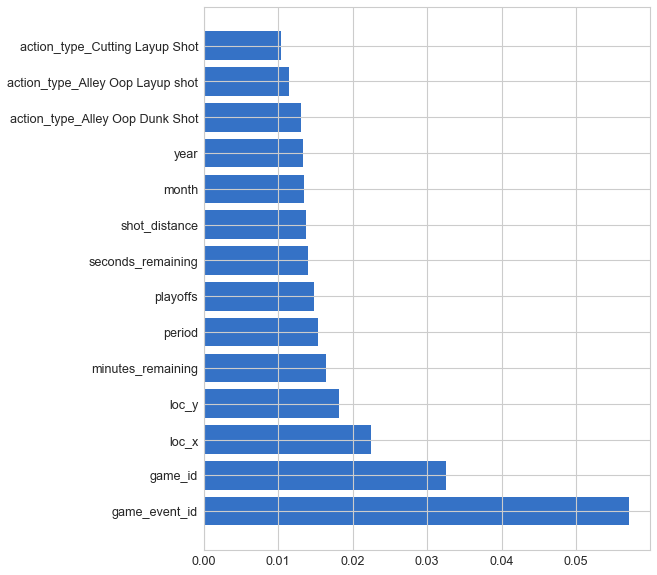

In [410]:
xx = np.hstack((pca.explained_variance_ratio_.reshape(-1, 1), X.columns.ravel().reshape(-1,1)))
FI = xx[xx[:,0]>0.01]
plt.figure(figsize=(8, 10))
plt.barh(np.arange(len(FI)), FI[:,0])
plt.yticks(np.arange(len(FI)),FI[:,1])

In [447]:
X[xx[0:10, 1]].head(5)

,game_event_id,game_id,loc_x,loc_y,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,month
1,12,20000012,-157,0,10,1,0,22,15,10
2,35,20000012,-101,135,7,1,0,45,16,10
3,43,20000012,138,175,6,1,0,52,22,10
4,155,20000012,0,0,6,2,0,19,0,10
5,244,20000012,-145,-11,9,3,0,32,14,10


Рассчитаем AUC для первых N признаков (наиболее значимых по методу PCA). Как видим из графика AUC при 40 первых признаках достигает максимального AUC и далее добавлением последующих большего количества признаков AUC не увеличивается

In [444]:
first_feats = [10,20,30,40,50,60, 70, 80,90,100,110,120,130,145]
AUC = []
for i in first_feats:
    X_tr, X_t, y_tr, y_t = train_test_split(X[xx[0:i, 1]], y, test_size=0.3, random_state=0)
    rfc_new = RandomForestClassifier(random_state=0)
    rfc_new.fit(X_tr,  y_tr)
    predictions_rf = rfc_new.predict_proba(X_t)
    AUC.append(roc_auc_score(y_t, predictions_rf[:, 1]))

Text(0, 0.5, 'AUC')

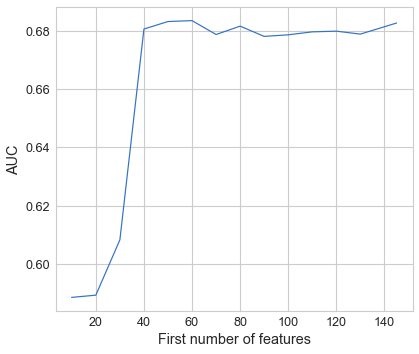

In [446]:

plt.plot(first_feats, AUC)
plt.xlabel("First number of features")
plt.ylabel("AUC")

In [466]:
X_PCAreduced[:, 0:2]

array([[ 3.75096182e+00,  3.06518113e+00, -9.05058193e-01, ...,
        -5.08602419e-17,  1.04071308e-17, -1.33478742e-16],
       [ 4.10112552e+00,  3.13965284e+00, -9.92514001e-01, ...,
        -4.34838323e-16, -4.07523862e-16, -1.30906330e-16],
       [ 1.23463638e+00, -2.04432434e+00,  1.12035995e-01, ...,
         3.91932455e-16, -3.00403595e-16, -1.23765034e-17],
       ...,
       [ 8.04654622e-01, -2.16879163e+00, -5.47910554e-02, ...,
         9.10396686e-17,  2.59169105e-17,  6.73846110e-18],
       [ 4.11635439e-01, -2.80562243e+00, -7.85462165e-03, ...,
        -1.67510967e-16,  1.06455889e-17,  1.24791573e-17],
       [ 5.63386309e-01, -2.44418281e+00, -9.15864416e-03, ...,
         7.77792016e-19, -9.42629349e-18, -3.82147335e-18]])

In [450]:
X_train.shape

(17987, 145)

In [468]:
X_PCAreduced.shape

(17987, 145)

Попробуем обучить модель с помощью PCA датасета  рассчитаем AUC на основе различного количества первых признаков. Улучшения качества не произошло и даже теперь нужно больше призанков (60), чтобы выйти на заданный уровень

In [469]:
xx_new = np.hstack((pca.explained_variance_ratio_.reshape(-1, 1), X.columns.ravel().reshape(-1,1)))
first_feats = [10,20,30,40,50,60, 70, 80,90,100,110,120,130,145]
AUC = []
for i in first_feats:
    X_tr, X_t, y_tr, y_t = train_test_split(X_PCAreduced[:, 0:i], y_train, test_size=0.3, random_state=0)
    rfc_new = RandomForestClassifier(random_state=0)
    rfc_new.fit(X_tr,  y_tr)
    predictions_rf = rfc_new.predict_proba(X_t)
    AUC.append(roc_auc_score(y_t, predictions_rf[:, 1]))

Text(0, 0.5, 'AUC')

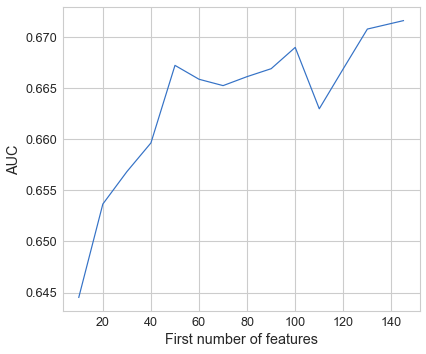

In [470]:
plt.plot(first_feats, AUC)
plt.xlabel("First number of features")
plt.ylabel("AUC")